No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ColDefs(
    name = 'WAVE'; format = '24318D'; unit = 'nm'
    name = 'FLUX'; format = '24318D'; unit = 'erg cm**(-2) s**(-1) angstrom**(-1)'
    name = 'ERR'; format = '24318D'; unit = 'erg cm**(-2) s**(-1) angstrom**(-1)'
    name = 'QUAL'; format = '24318J'
    name = 'SNR'; format = '24318D'
    name = 'FLUX_REDUCED'; format = '24318D'; unit = 'adu'
    name = 'ERR_REDUCED'; format = '24318D'; unit = 'adu'
)


(5750.0, 7250.0)

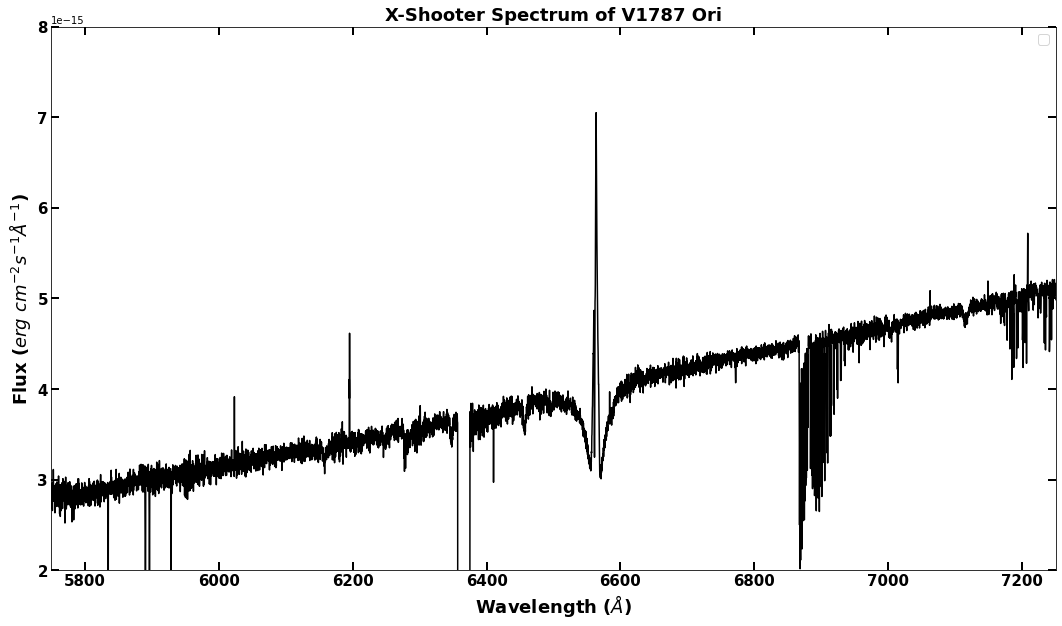

In [26]:
import sys
from astropy.io import fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def process_fits_data(file_path):
    """
    Process FITS file and return a DataFrame with wavelength and flux data.
    
    Parameters:
    file_path : str
        Path to the FITS file
    
    Returns:
    pandas.DataFrame
        DataFrame containing 'wavelength' and 'flux' columns
    """
    with pyfits.open(file_path) as hdulist:
        # Print column information
        print(hdulist[1].columns)
        
        # Get the data from extension 1
        scidata = hdulist[1].data
        
        # Extract wavelength and flux data
        wave = scidata[0][0]
        arr1 = scidata[0][1]
        
        # Create DataFrame, ensuring data is in native byte order
        df_obs = pd.DataFrame({
            'wavelength': wave.astype(wave.dtype.newbyteorder('=')),
            'flux': arr1.astype(arr1.dtype.newbyteorder('='))
        })
        
        # Convert wavelength to Angstroms (assuming it's in nm)
        df_obs['wavelength'] *= 10
        
    return df_obs

# Process the FITS file
file_path = "/home/arun/Backup/X-Shooter/ADP.2022-01-12T15:28:58.045.fits"
df_obs = process_fits_data(file_path)

# Cut the dataframe to the desired wavelength range
df_cut = df_obs[(df_obs['wavelength'] >= 6380) & (df_obs['wavelength'] <= 6800)]

# Example: Plot the cut spectrum
plt.figure(figsize=(18, 10))
plt.plot(df_obs['wavelength'], df_obs['flux'],'k')
#plt.axvline(6562.8, color='r', linestyle='--', label='6563 Å')
#plt.axvline(6561.2, color='r', linestyle='--', label='6563 Å')
plt.tick_params(direction='in', which ="major",labelsize = 15,length=8, width=2, 
                   colors='k',grid_color='k', grid_alpha=1,bottom=True, top=True, left=True, right=True)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.xlabel('Wavelength ($\AA$)',fontsize=18,fontweight='bold')
plt.ylabel('Flux ($erg~cm^{-2} s^{-1} \AA^{-1}$)',fontsize=18,fontweight='bold')
plt.legend(prop={'size': 14,'weight':'bold'}, ncol=1)

plt.title('X-Shooter Spectrum of V1787 Ori',fontsize=18,fontweight='bold')
plt.ylim(2e-15,8e-15)
plt.xlim(5750,7250)

#plt.show()
#plt.savefig("Xshoot.jpeg")


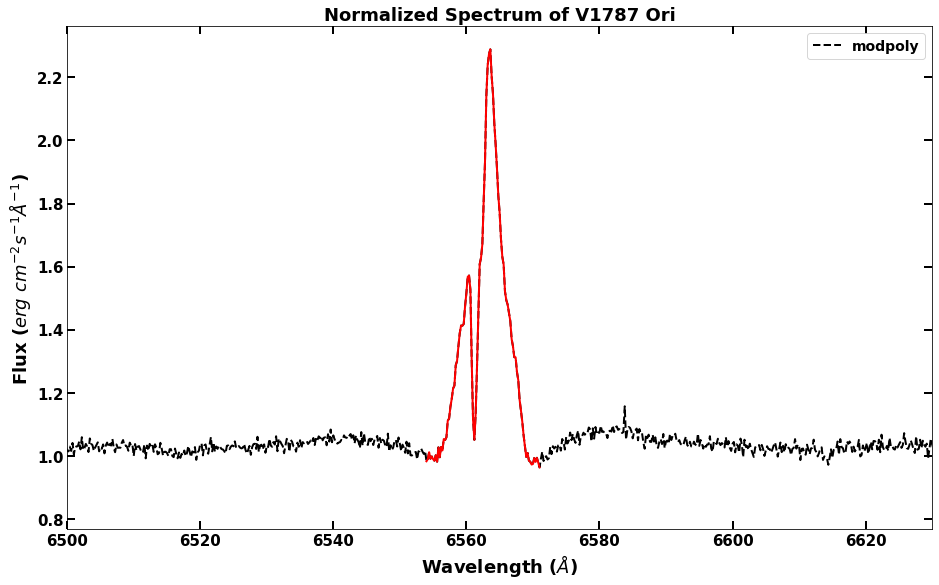

In [35]:
from pybaselines import Baseline, utils



baseline_fitter = Baseline(x_data=df_cut['wavelength'])

bkg_1, params_1 = baseline_fitter.modpoly(df_cut['flux'], poly_order=30)

#plt.plot(df_cut['wavelength'], df_cut['flux'])
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Cut Spectrum (6400-6800 Angstrom)')
#plt.plot(df_cut['wavelength'], bkg_1, '--', label='modpoly')

plt.plot(df_cut['wavelength'], df_cut['flux']/bkg_1, 'k--', lw=2,label='modpoly')
df_cut["normalized_flux"] = df_cut['flux']/bkg_1
plt.xlim(6500,6630)
plt.tick_params(direction='in', which ="major",labelsize = 15,length=8, width=2, 
                   colors='k',grid_color='k', grid_alpha=1,bottom=True, top=True, left=True, right=True)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.xlabel('Wavelength ($\AA$)',fontsize=18,fontweight='bold')
plt.ylabel('Flux ($erg~cm^{-2} s^{-1} \AA^{-1}$)',fontsize=18,fontweight='bold')
plt.legend(prop={'size': 14,'weight':'bold'}, ncol=1)

plt.title('Normalized Spectrum of V1787 Ori',fontsize=18,fontweight='bold')

ew_measure = df_cut[(df_cut['wavelength'] >= 6554) & (df_cut['wavelength'] <= 6571)]
plt.plot(ew_measure['wavelength'], ew_measure['normalized_flux'], 'r-',lw=2, label='modpoly')

fig=plt.gcf()
fig.set_size_inches(15.5, 9.25)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import StdDevUncertainty
from astropy import units as u
from specutils import Spectrum1D
from specutils.analysis import equivalent_width
from specutils.analysis import gaussian_sigma_width, gaussian_fwhm, fwhm, fwzi
# Simulate a non-symmetric double-peak emission line profile
wavelength = np.array(ew_measure['wavelength']) * u.AA
flux = np.array(ew_measure['normalized_flux']) * u.Unit('Jy')

# Adding noise


# Create Spectrum1D object
spectrum = Spectrum1D(spectral_axis=wavelength, flux=flux)
plt.figure(figsize=(10, 6))

# Measure the equivalent width using specutils
ew = equivalent_width(spectrum)

print(f"Equivalent Width: {ew:.2f}")


FWHM =fwhm(spectrum) 

print(f"Full Width Half Maximum: {FWHM:.2f}")



Equivalent Width: -5.94 Angstrom
Full Width Half Maximum: 6.79 Angstrom


<Figure size 720x432 with 0 Axes>

10.533811389515286 Angstrom
6.789102995682697 Angstrom
